In [6]:
#!/usr/bin/env python
# coding: utf-8

# ML Project

In[335]:

In [7]:
import pandas as pd

In[336]:

In [8]:
housing = pd.read_csv("data.csv")

In[337]:

In [9]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In[338]:

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In[339]:

In [11]:
housing['LSTAT'].value_counts()

LSTAT
7.79     3
14.10    3
6.36     3
18.13    3
8.05     3
        ..
3.32     1
1.92     1
1.73     1
6.43     1
7.88     1
Name: count, Length: 455, dtype: int64

In[340]:

In [12]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285008,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705096,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In[341]:

%matplotlib inline<br>
import matplotlib.pyplot as plt<br>
housing.hist(bins=50, figsize = (20, 15))

# Train Test Splitting<br>


In[342]:

In [13]:
import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In[343]:

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 404
Rows in test set: 102


In[344]:

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In[345]:

In [16]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In[346]:

In [17]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In[347]:

In [18]:
housing = strat_train_set.copy()

# Looking for Correlation

In[348]:

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680301
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In[349]:

In [20]:
corr_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, CRIM to MEDV
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     14 non-null     float64
 1   ZN       14 non-null     float64
 2   INDUS    14 non-null     float64
 3   CHAS     14 non-null     float64
 4   NOX      14 non-null     float64
 5   RM       14 non-null     float64
 6   AGE      14 non-null     float64
 7   DIS      14 non-null     float64
 8   RAD      14 non-null     float64
 9   TAX      14 non-null     float64
 10  PTRATIO  14 non-null     float64
 11  B        14 non-null     float64
 12  LSTAT    14 non-null     float64
 13  MEDV     14 non-null     float64
dtypes: float64(14)
memory usage: 2.2+ KB


In[350]:

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "ZN", "RM", "LSTAT"]
# scatter_matrix(housing[attributes], figsize=(12, 8))

In[351]:

<Axes: xlabel='RM', ylabel='MEDV'>

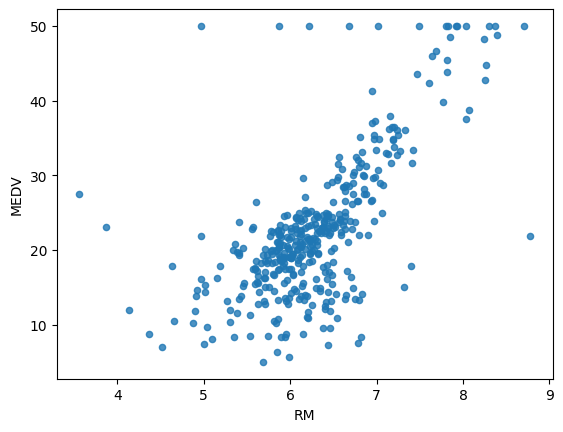

In [22]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha = 0.8)

Trying out combinations

In[352]:

housing["TAXRM"] = housing["TAX"]/housing["RM"]<br>
corr_matrix = housing.corr()<br>
corr_matrix['MEDV'].sort_values(ascending=False)

In[353]:

housing.plot(kind="scatter", x="TAXRM", y= "MEDV")

In[354]:

In [23]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In[355]:

In [24]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

In[356]:

In [25]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


Missing Attributes

To take care of missing attributes, you have three option:<br>
    1. Get rid of the missing data points(If few data points are missing)<br>
    2. Get rid of the whole attribute(When correlation is not matter)<br>
    3. Set the value to some value (0, mean or median)

In[357]:

In [26]:
a= housing.dropna(subset="RM") #Option 1
a.shape
#Note that original data will be unchanged

(399, 13)

In[358]:

In [27]:
housing.drop("RM", axis=1).shape #Option 2
#Note that original data will be unchanged

(404, 12)

In[359]:

In [28]:
median = housing["RM"].median() #Option 3
housing["RM"].fillna(median)
#Note that original data will be unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In[360]:

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In[361]:

In [30]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279436,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711769,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In[362]:

In [31]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


Scikit-learn Design

Primarily, three types of objects<br>
 <br>
  1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters.<br>
<br>
  2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.<br>
<br>
  3. Predictors - Linear Regression model is an example of predictors. fit() and predict() are two common funtions. It also gives score() function which will evaluate the predictions

#Creating Pipelines

Primarily, two types of feature scaling methods:<br>
1. Min-max scaling (Normalization):<br>
    (value - min)/(max - min)<br>
    Sklearn provides a class called MinMaxScaler for this<br>
<br>
2. Standardization:<br>
    (value - mean)/std<br>
    sklearn provides a class called StandardScaler for this

In[363]:

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])

In[364]:

In [33]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In[365]:

In [34]:
housing_num_tr.shape

(404, 13)

Selecting a desired model

In[366]:

In [35]:
housing_labels.info

<bound method Series.info of 254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64>

In[367]:

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()<br>
model = DecisionTreeRegressor()

In [37]:
model = RandomForestRegressor()

In [38]:
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In[368]:

In [39]:
some_data = housing.iloc[:5]

In[369]:

In [40]:
some_labels = housing_labels.iloc[:5]

In[370]:

In [41]:
prepared_data = my_pipeline.transform(some_data)

In[371]:

In [42]:
model.predict(prepared_data)

array([22.325, 25.969, 16.525, 23.329, 23.416])

In[372]:

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

Evaluating the model

In[373]:

In [44]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In[374]:

In [45]:
rmse

1.1916143150124425

Using better evalution technique - Cross Validation

In[375]:

In [46]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = 'neg_mean_squared_error', cv = 10)
rmse_scores = np.sqrt(-scores)

In[376]:

In [47]:
rmse_scores

array([2.86031574, 2.89785631, 4.4810358 , 2.68661999, 3.65851961,
       2.58083809, 4.7570827 , 3.34519043, 3.29986177, 3.27316559])

In[377]:

In [48]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In[378]:

In [49]:
print_scores(rmse_scores)

Scores:  [2.86031574 2.89785631 4.4810358  2.68661999 3.65851961 2.58083809
 4.7570827  3.34519043 3.29986177 3.27316559]
Mean:  3.384048602347467
Standard deviation:  0.6947706935272232


Saving The Model

In[379]:

In [50]:
from joblib import dump, load
dump(model, 'model.joblib')

['model.joblib']

Testing the data on test data

In[380]:

In [51]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(final_predictions, list(Y_test))

In[381]:

In [52]:
final_rmse

2.8635859495038862